# Personal Information
Name: **Yunlong Cheng**

StudentID: **14949423**

Email: [**14949423@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **19.03.2024**

# Data Context
The Reaxys chemsitry database comprises over 14 million reactions, from which 3.06 million reactions has assigned a single class(Some reactions belong to different Class-ID, but not means belong to different classes). Chemical reactions are represented by SMILES strings, and the dataset is categorized under 1647 distinct class labels. This dataset, focusing solely on reactants and products, demonstrates a substantial imbalance.

# Data Description

**Analysis 1:** The dataset has 1674 different class labels, and 3060192 different reactions. There are no duplicated data in the dataset, and only one reaction missing the data of products. But here are 228109 rows of reactions may cuase trouble, which contain a "." or ">>"(We are going to combine reactants and products into R1.R2>>P1.P2).

**Analysis 2:** We visualized the distribution of counts of reactants and products for each reaction, and find 51.5% reactions having 2 reactants and 1 product, which are the most common in this dataset. 38.3% reactions have 1 reactant and 1 product, which are the second common in this dataset. Only 2.2% reactions have the number of reactants or products greater than 3.

**Analysis 3:** We visualized the number of each reactions belonging to different Class-IDs. 81.19% reactions only belong to one Class-ID, 16.85% belong to two different IDs. However, in our dataset, different Class-IDs are not meaning with different different reaction classes.

**Analysis 4:** We visualized the population of class label, and there are many Classes with low population of reaction which may be not sufficient for training, 500 of the 1470 classes with less than 50 reactions.


## Data Loading

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/3m.tsv', delimiter='\t')

/tmp/ipykernel_3198888/807572233.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/3m.tsv', delimiter='\t')


In [4]:
df

,CLASS-ID,RX.ID,#reactants,#products,REACTANT1,REACTANT2,REACTANT3,REACTANT4,REACTANT5,REACTANT6,...,PRODUCT3,PRODUCT4,PRODUCT5,PRODUCT6,PRODUCT7,PRODUCT8,PRODUCT9,PRODUCT10,PRODUCT11,PRODUCT12
0,"272, 327, 1128, 1226",20308219,1,1,CC1(C)O[C@H]2[C@H]3C[C@@H]([C@H]2O1)C(=O)C3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,84,20308266,1,1,CC(=O)OC(\C=C\c1ccccc1)C#N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68,20308388,1,1,CC1(C)O[C@H]2[C@H](OC(=O)[C@H]2O1)[C@@H](O)CO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1872,20308549,1,1,O=Cc1ccccc1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,636,20308813,1,1,ClC(=O)c1ccccc1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060187,72,20308054,1,1,CCc1ccc2c3ccc4c(OC(C)=O)ccc([C@@H]5O[C@H](COC(...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060188,42,20308093,1,1,CC1(C)C2CC1C(=C)CC2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060189,42,20308094,1,1,CC1(C)C2CC1C(=C)CC2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3060190,256,20308164,1,1,COC(=O)CCC[C@H](O)C=CBr,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = df

### Analysis 1: 
For this part, we are ging to show some basic statistics in this dataset, also do some data checkings.

#### The number of classes

In [7]:
unique_class_ids = set()
data['CLASS-ID'].str.split(',').apply(lambda x: unique_class_ids.update(x))
unique_class_id_count = len(unique_class_ids)
unique_class_id_count

1674

#### Dubplicate checking

In [8]:
duplicate_rows_count = data.duplicated().sum()
duplicate_rows_count

0

In [9]:
duplicate_rx_id_count = data['RX.ID'].duplicated().sum()
duplicate_rx_id_count

0

#### Missing reactants or products checking

In [10]:
# Define a function to check for reactions without reactants or products
def check_missing_reactants_or_products(row):
    has_reactants = row['#reactants'] > 0 and pd.notna(row['REACTANT1'])
    has_products = row['#products'] > 0 and pd.notna(row['PRODUCT1'])
    return not (has_reactants and has_products)

In [11]:
missing_data_count = data.apply(check_missing_reactants_or_products, axis=1).sum()
missing_data_count

1

In [12]:
missing_data = data[data.apply(check_missing_reactants_or_products, axis=1)]
missing_data

,CLASS-ID,RX.ID,#reactants,#products,REACTANT1,REACTANT2,REACTANT3,REACTANT4,REACTANT5,REACTANT6,...,PRODUCT3,PRODUCT4,PRODUCT5,PRODUCT6,PRODUCT7,PRODUCT8,PRODUCT9,PRODUCT10,PRODUCT11,PRODUCT12
2064408,"912, 1407",49004297,2,1,[C]c1cccc(N)c1C=O,CC[C@@]1(O)C(=O)OCc2c1cc1C(=O)CCn1c2=O,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Trouble data checking

In [13]:
# Define a function to check if a value contains a "." or ">>", because we are going to combine reactants and products into R1.R2>>P1.P2.
def check_special_characters(value):
    if pd.isna(value):
        return False
    return '.' in value or '>>' in value

In [14]:
special_character_counts = sum(
    data[column].apply(check_special_characters).sum()
    for column in ['REACTANT1', 'REACTANT2', 'REACTANT3', 'REACTANT4', 'REACTANT5', 'PRODUCT1', 'PRODUCT2', 'PRODUCT3', 'PRODUCT4', 'PRODUCT5']
)
special_character_counts

258373

In [15]:
def row_contains_special_characters(row):
    for item in row[['REACTANT1', 'REACTANT2', 'REACTANT3', 'REACTANT4', 'REACTANT5', 'PRODUCT1', 'PRODUCT2', 'PRODUCT3', 'PRODUCT4', 'PRODUCT5']]:
        if pd.notna(item) and ('.' in item or '>>' in item):
            return True
    return False
trouble_rows = data[data.apply(row_contains_special_characters, axis=1)]
trouble_rows


KeyboardInterrupt



### Analysis 2: 
Count of reactants and products per reaction

In [6]:
combination_counts = {}
# Loop over each row in the data to count combinations of reactants and products
for _, row in data.iterrows():
    reactants = row['#reactants']
    products = row['#products']
    key = (reactants, products)
    
    if key in combination_counts:
        combination_counts[key] += 1
    else:
        combination_counts[key] = 1

In [7]:
# Convert counts to percentages and combine all counts of reactants or products greater than 3 into 'other'
total_reactions = sum(combination_counts.values())
combination_percentages = {}
other_percentage = 0
for key, count in combination_counts.items():
    if key[0] > 3 or key[1] > 3:
        other_percentage += (count / total_reactions) * 100
    else:
        combination_percentages[key] = (count / total_reactions) * 100

In [8]:
# If there's any 'other' percentage, we add it to the dictionary
if other_percentage > 0:
    combination_percentages['other'] = other_percentage

In [9]:
# Sorting the keys for a nicer plot, first by reactants then by products
sorted_keys = sorted(combination_percentages, key=lambda x: (x if x != 'other' else (4, 4)))

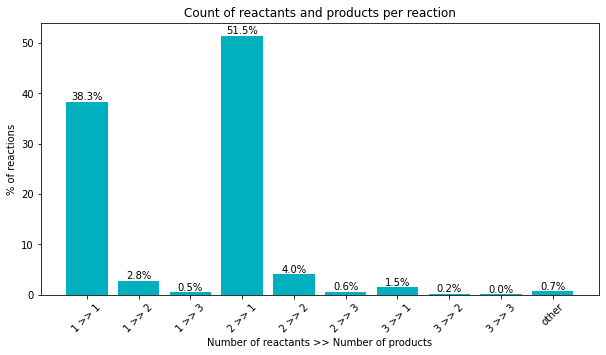

In [17]:
# Plotting
x_labels = [f'{k[0]} >> {k[1]}' if k != 'other' else 'other' for k in sorted_keys]
percentages = [combination_percentages[k] for k in sorted_keys]

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(x_labels, percentages, color='#00b0be')
ax.set_xlabel('Number of reactants >> Number of products')
ax.set_ylabel('% of reactions')
ax.set_title('Count of reactants and products per reaction')

for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
            ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

### Analysis 3:
Reactions Belonging to Different Number of Class-ID

In [20]:
num_classes_per_reaction = data['CLASS-ID'].str.split(', ').apply(len)
num_classes_counts = num_classes_per_reaction.value_counts(normalize=True).sort_index() * 100

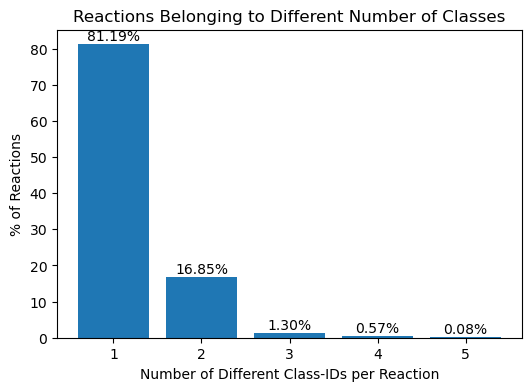

In [21]:
# Plot the distribution
fig, ax = plt.subplots(figsize=(6,4))
bars = ax.bar(num_classes_counts.index, num_classes_counts.values)

ax.set_xlabel('Number of Different Class-IDs per Reaction')
ax.set_ylabel('% of Reactions')
ax.set_title('Reactions Belonging to Different Number of Class-IDs')

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='baseline')

plt.show()

### Analysis 4:
Population of Class Label

In [13]:
# Split some reactions belongs to many classes.
df['CLASS-ID'] = df['CLASS-ID'].astype(str)
df = df.assign(**{'CLASS-ID': df['CLASS-ID'].str.split(', ')}).explode('CLASS-ID')

In [14]:
# Count the occurrences of each CLASS-ID
id_counts = df['CLASS-ID'].value_counts()
count_data = pd.DataFrame({'CLASS-ID': id_counts.index, 'Count': id_counts.values})

In [15]:
# Define bins and labels for the specified ranges based on count
bins = [0, 10, 50, 100, 500, 1000, np.inf]
labels = ['1-10', '11-50', '51-100', '101-500', '501-1000', '1001+']
# Categorize the count of CLASS-IDs into the defined bins
count_data['Range Group'] = pd.cut(count_data['Count'], bins=bins, labels=labels)
# Count the number of CLASS-ID occurrences in each range
range_group_counts = count_data['Range Group'].value_counts().reindex(labels)

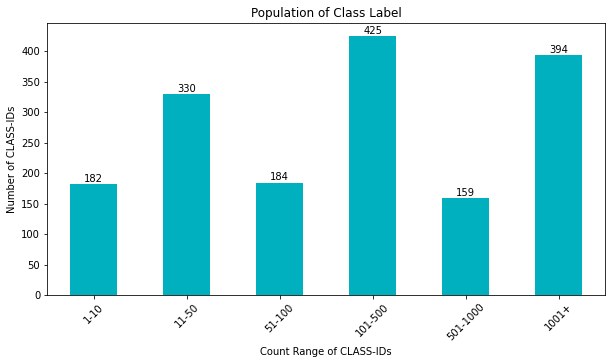

In [24]:
# Plot the distribution
ax = range_group_counts.plot(kind='bar', figsize=(10, 5), color='#00b0be')
plt.title('Population of Class Label')
plt.xlabel('Count Range of CLASS-IDs')
plt.ylabel('Number of CLASS-IDs')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                xytext=(0, 0.5), 
                textcoords='offset points')

plt.show()
